**Face Detection**


**Face Detection**

In [0]:
from PIL import Image,ImageDraw
from pathlib import Path
!pip install face_recognition
import face_recognition 

In [0]:
#load jpg file into numpy array
image = face_recognition.load_image_file('/content/people.jpg')

In [0]:
#find all the faces in the image
face_locations = face_recognition.face_locations(image)


In [0]:
num_of_faces = len(face_locations)
print("I found {} faces ".format(num_of_faces))

I found 6 faces 


In [0]:
#for drawing box over image changing format to PIL(python imaging library)
pil_img = PIL.Image.fromarray(image)

In [0]:
for face_location in face_locations:

  #print location of each image 
  top,right,bottom,left = face_location
  print("A face is located at pixel locations top:{} , right:{} , bottom:{} ,left:{} ".format(top,right,bottom,left))
  #draw box over image
  draw = PIL.ImageDraw.Draw(pil_img)
  draw.rectangle([left,top,right,bottom],outline = 'red')



A face is located at pixel locations top:163 , right:605 , bottom:271 ,left:497 
A face is located at pixel locations top:186 , right:364 , bottom:275 ,left:275 
A face is located at pixel locations top:211 , right:175 , bottom:319 ,left:67 
A face is located at pixel locations top:295 , right:760 , bottom:402 ,left:653 
A face is located at pixel locations top:271 , right:474 , bottom:378 ,left:366 
A face is located at pixel locations top:152 , right:832 , bottom:259 ,left:724 


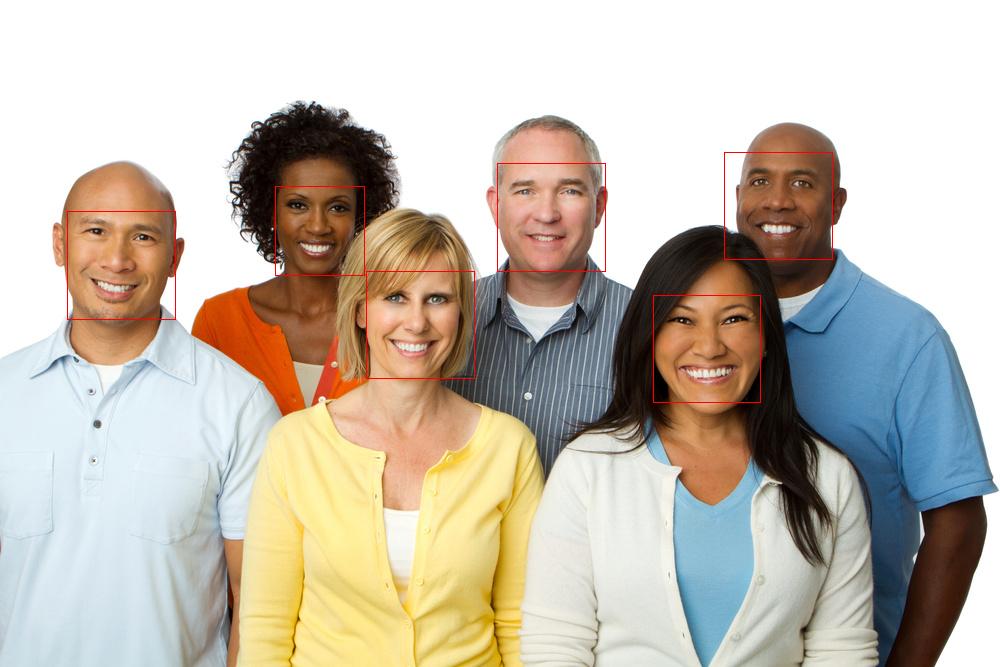

In [0]:
#display image on screen 
display(pil_img)
  

**Face Landmark(feature) Detection**

In [0]:
#find all facial features in all faces in image
face_landmarks_list = face_recognition.face_landmarks(image) 

In [0]:
#loop over each face
for face_landmarks in face_landmarks_list:

  #Loop over each feature(eyes,nose,ears etc)
  for name,list_of_points in face_landmarks.items():

    #print location of each feature in this image
    print("The {} in this face has following points:{}".format(name,list_of_points))

    #trace out each facial feature with line
    draw.line(list_of_points,fill = "red",width = 2)

The chin in this face has following points:[(497, 193), (498, 206), (499, 219), (500, 232), (504, 244), (512, 255), (521, 264), (532, 271), (544, 274), (557, 272), (569, 266), (579, 258), (588, 247), (593, 234), (596, 221), (597, 208), (598, 194)]
The left_eyebrow in this face has following points:[(508, 186), (514, 182), (520, 179), (528, 179), (536, 181)]
The right_eyebrow in this face has following points:[(558, 180), (566, 179), (574, 179), (582, 180), (588, 186)]
The nose_bridge in this face has following points:[(547, 191), (546, 200), (546, 208), (545, 217)]
The nose_tip in this face has following points:[(536, 221), (541, 223), (546, 225), (551, 223), (556, 221)]
The left_eye in this face has following points:[(517, 193), (522, 190), (528, 190), (533, 193), (527, 194), (522, 194)]
The right_eye in this face has following points:[(562, 193), (567, 190), (573, 190), (578, 193), (573, 194), (567, 194)]
The top_lip in this face has following points:[(526, 236), (533, 234), (540, 23

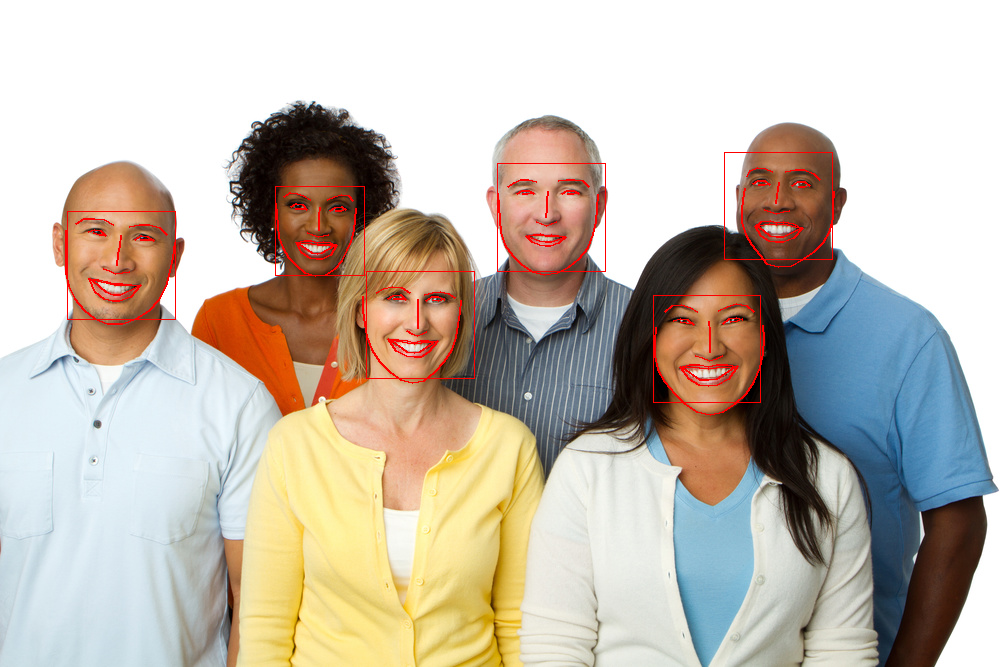

In [0]:
#display image
display(pil_img)

**Face encoding**

In [0]:
image2 = face_recognition.load_image_file('/content/person2.jpg')

In [0]:
#generating face encodings
face_encodings = face_recognition.face_encodings(image2)

In [0]:
if len(face_encodings) == 0:
  #no faces are found 
  print("No faces were found")
else:
  first_face_encodings = face_encodings[0]
  print(first_face_encodings)

[-0.20855848  0.01845221  0.05200069 -0.01912931 -0.02748846 -0.0185511
 -0.02725502 -0.0184502   0.19835591 -0.01124571  0.19645655  0.01600671
 -0.1562179  -0.08862403 -0.00915144  0.11604419 -0.12597212 -0.14229295
 -0.03572813 -0.03505826  0.03726114  0.03980887 -0.0778265   0.07926033
 -0.14744225 -0.34706169 -0.1085614  -0.1221678   0.01723722 -0.11650673
  0.0651128  -0.03900216 -0.18297049 -0.10930692  0.06847555  0.12637649
 -0.05037967 -0.09572256  0.13429838 -0.00703442 -0.16005878 -0.05573077
  0.08435316  0.2744185   0.13435352  0.08523724  0.00496123 -0.11246414
  0.16313246 -0.27373856  0.0840245   0.10128951  0.15344816  0.10832102
  0.11609218 -0.09201841  0.07474771  0.25488389 -0.30816692  0.1020755
  0.00198589 -0.01495531  0.0341169  -0.02620061  0.21705669  0.14441338
 -0.11093326 -0.12751678  0.17208105 -0.1618311  -0.0496816   0.1283944
 -0.03207508 -0.26411173 -0.31615111  0.07128871  0.36263984  0.18028158
 -0.13117108 -0.01013264 -0.0581111  -0.00737815  0.03

**Face Recognition**

In [0]:
#load image
imgperson1 = face_recognition.load_image_file("/content/person_1.jpg")
imgperson2 = face_recognition.load_image_file("/content/person_2.jpg")
imgperson3 = face_recognition.load_image_file("/content/person_3.jpg")

In [0]:
#face encodings
enco_person1 = face_recognition.face_encodings(imgperson1)[0]
enco_person2 = face_recognition.face_encodings(imgperson2)[0]
enco_person3 = face_recognition.face_encodings(imgperson3)[0]

In [0]:
#making array of face encodings
known_persons_enco = [enco_person1,enco_person2,enco_person3]

In [0]:
#loading unknown person img
img_unknown = face_recognition.load_image_file("/content/unknown_7.jpg")
#face encodings
face_loc = face_recognition.face_locations(img_unknown,number_of_times_to_upsample=2)
unknown_persons_enco = face_recognition.face_encodings(img_unknown,known_face_locations=face_loc)



In [0]:
#there can be multiple faces in single unknown img so looping over each face
 for unknown_person_enco in unknown_persons_enco:

   result = face_recognition.compare_faces(known_persons_enco,unknown_person_enco)

   name = "unknown"

   if result[0]:
     name = "person 1"
   elif result[1]:
     name = "person 2"
   elif result[2]:
     name = "person 3"

 print("image is of {}".format(name))

image is of person 2


**fun uses of face recognition**

In [0]:
image3 = face_recognition.load_image_file("/content/people.jpg")

In [0]:
face_landmarks_list2 = face_recognition.face_landmarks(image3)
pil_img2 = Image.fromarray(image3)

In [0]:
#create a pil drawing object for drawing lines later
d = ImageDraw.Draw(pil_img2,"RGBA")

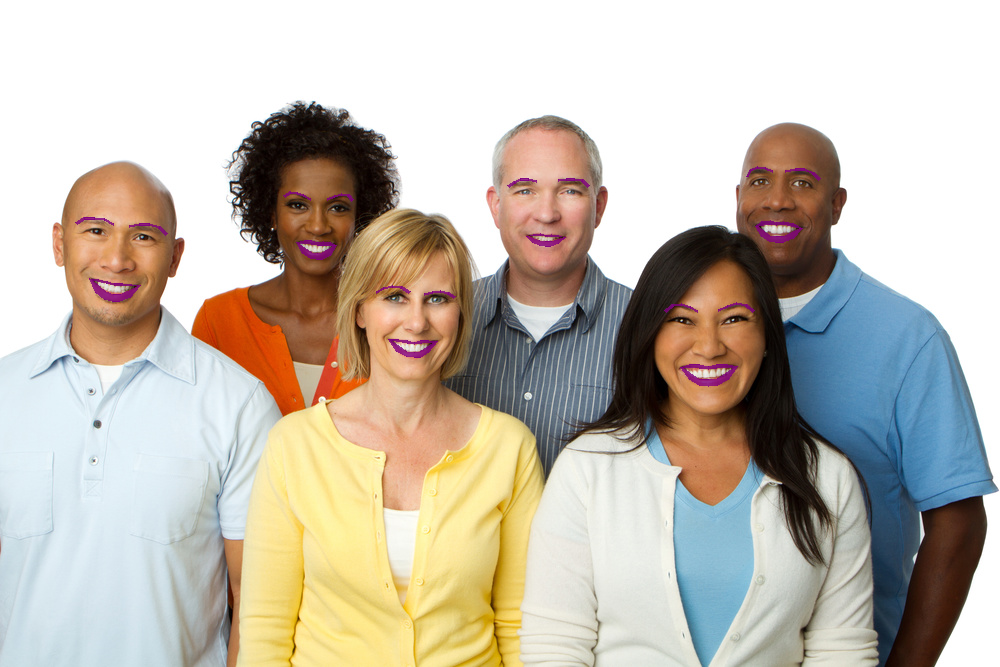

In [0]:
for face_landmark in face_landmarks_list2:

  #draw line over eyebrows
  d.line(face_landmark["left_eyebrow"],fill = (128,0,128,100),width=3)
  d.line(face_landmark["right_eyebrow"],fill = (128,0,128,100),width=3)
  #draw line over lips
  d.polygon(face_landmark["top_lip"],fill = (128,0,128,100))
  d.polygon(face_landmark["bottom_lip"],fill = (128,0,128,100))
display(pil_img2)

**Face lookalikes**

In [0]:
known_image = face_recognition.load_image_file("/content/test_face.jpg")
known_image_enco = face_recognition.face_encodings(known_image)[0]

In [0]:
#variables to keep track of most similar faces
best_face_distance = 1.0
best_face = None

In [0]:
#loop over all images we want to check for similarity
for image_path in Path("/content/drive/My Drive/people").glob("*.png") :

  unknown_image = face_recognition.load_image_file(image_path)
  unknown_face_enco = face_recognition.face_encodings(unknown_image)
  face_distance = face_recognition.face_distance(unknown_face_enco,known_image_enco)[0]

  #finding best face
  if face_distance < best_face_distance:
     best_face_distance = face_distance
     best_face = unknown_image



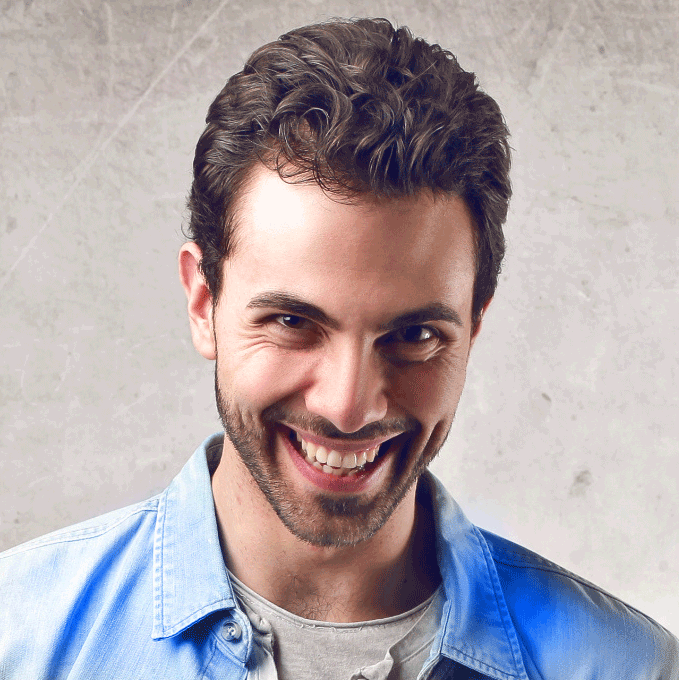

In [0]:
pil_img3 = Image.fromarray(best_face)
display(pil_img3)